<a href="https://colab.research.google.com/github/bharti001/Machine-Learning-/blob/main/Assignment_06_bharti_singal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Install Required Libraries- not required**

**Step 2: Load and Preprocess the Data**

Load and Preprocess the Data
1. Load the Iris Dataset using scikit-learn.
2. Standardize the Data to scale features.
3. Split the Data into training (80%) and testing (20%).
4. Reshape the Data for 1D CNN:
○ Format: (samples, features, channels)
○ Use: (samples, 4, 1) since Iris has 4 features and 1 channel.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Load the Iris Dataset
iris = load_iris()
# Convert to DataFrame for better display
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
display(iris_df.head())
X, y = iris.data, iris.target

#Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Reshape the Data for 1D CNN
# Format: (samples, features, channels)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Original data shape:", X.shape)
print("Scaled data shape:", X_scaled.shape)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Reshaped training data shape for 1D CNN:", X_train_reshaped.shape)
print("Reshaped testing data shape for 1D CNN:", X_test_reshaped.shape)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Original data shape: (150, 4)
Scaled data shape: (150, 4)
Training data shape: (120, 4)
Testing data shape: (30, 4)
Reshaped training data shape for 1D CNN: (120, 4, 1)
Reshaped testing data shape for 1D CNN: (30, 4, 1)


**Step 3: Build the CNN Model**

Construct a simple 1D CNN with the following:
1. Conv1D Layer with 32 filters, kernel size of 3, and ReLU activation.
2. MaxPooling1D Layer to downsample.
3. Flatten Layer to flatten the output.
4. Dense Layer with 64 neurons and ReLU activation.
5. Output Layer with 3 neurons and softmax activation (for 3-class classification).

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax') # Output layer for 3 classes
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,435 (9.51 KB)

 Trainable params: 2,435 (9.51 KB)

 Non-trainable params: 0 (0.00 B)

**Step 4: Compile the Model**
Compile your model using:

● Optimizer: Adam

● Loss Function: sparse_categorical_crossentropy

● Metrics: Accuracy

In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,435 (9.51 KB)

 Trainable params: 2,435 (9.51 KB)

 Non-trainable params: 0 (0.00 B)

**Step 5: Train the Model**
1. Use model.fit() method
2. Set epochs (e.g., 10) and batch size (e.g., 8)
3. Include validation split (e.g., 20%)

In [4]:
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=8, validation_split=0.2)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.3722 - loss: 1.1079 - val_accuracy: 0.5000 - val_loss: 1.0216
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7659 - loss: 0.9360 - val_accuracy: 0.5833 - val_loss: 0.9177
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7686 - loss: 0.8021 - val_accuracy: 0.8333 - val_loss: 0.8174
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7878 - loss: 0.7291 - val_accuracy: 0.8333 - val_loss: 0.7208
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8484 - loss: 0.6106 - val_accuracy: 0.8333 - val_loss: 0.6326
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8125 - loss: 0.5581 - val_accuracy: 0.8333 - val_loss: 0.5632
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8023 - loss: 0.5247 - val_accuracy: 0.8750 - val_loss: 0.4992
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8307 - loss: 0.4298 - val_accuracy: 0.8750 - va

**Step 6: Evaluate the Model**
1. Evaluate on test set using model.evaluate()
2. Report test accuracy and discuss observations

In [5]:
#Evaluate the Model
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.3085
Test Accuracy: 0.9000


Answer:
The model achieved a test accuracy of 0.9000. Comparing this to the training and validation accuracy shown in the plots below, we can observe that the test accuracy is close to the validation accuracy, it suggests the validation set was a good indicator of performance on unseen data. Based on the trends in the accuracy and loss plots, there appear to be no obvious signs of overfitting or underfitting. Overall, the 1D CNN performed well on the Iris dataset. Even with a simple architecture and a small dataset, the model was able to achieve a good level of accuracy in classifying the different iris species.

**Step 7: Visualize the Results**
1. Plot training and validation accuracy over epochs
2. Plot training and validation loss over epochs
3. Use matplotlib and include titles, axis labels, and legends


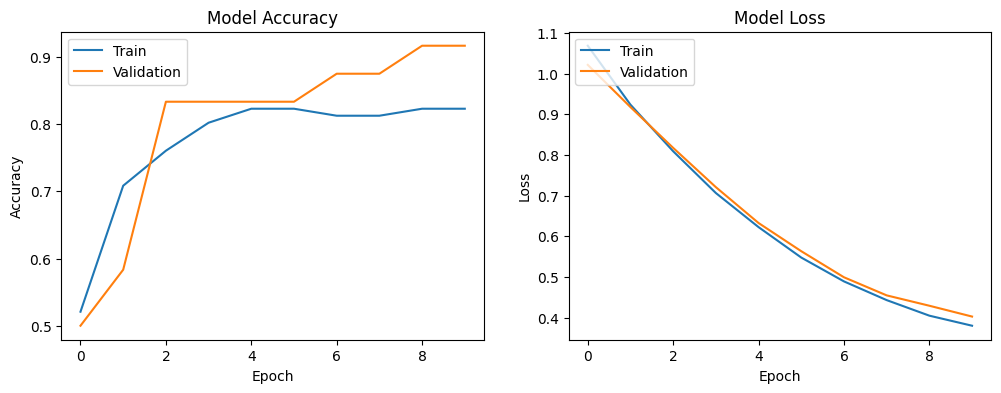

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()